<a href="https://colab.research.google.com/github/Marinagp25/Python/blob/main/Aula10_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB

In [46]:
base_risco_credito = pd.read_csv('/content/risco_credito.csv')

In [47]:
base_risco_credito

,historia,divida,garantias,renda,risco
0,ruim,alta,nenhuma,0_15,alto
1,desconhecida,alta,nenhuma,15_35,alto
2,desconhecida,baixa,nenhuma,15_35,moderado
3,desconhecida,baixa,nenhuma,acima_35,alto
4,desconhecida,baixa,nenhuma,acima_35,baixo
5,desconhecida,baixa,adequada,acima_35,baixo
6,ruim,baixa,nenhuma,0_15,alto
7,ruim,baixa,adequada,acima_35,moderado
8,boa,baixa,nenhuma,acima_35,baixo
9,boa,alta,adequada,acima_35,baixo


In [48]:
X_risco_credito = base_risco_credito.iloc[:, 0:4].values
X_risco_credito

array([['ruim', 'alta', 'nenhuma', '0_15'],
       ['desconhecida', 'alta', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', '15_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'nenhuma', 'acima_35'],
       ['desconhecida', 'baixa', 'adequada', 'acima_35'],
       ['ruim', 'baixa', 'nenhuma', '0_15'],
       ['ruim', 'baixa', 'adequada', 'acima_35'],
       ['boa', 'baixa', 'nenhuma', 'acima_35'],
       ['boa', 'alta', 'adequada', 'acima_35'],
       ['boa', 'alta', 'nenhuma', '0_15'],
       ['boa', 'alta', 'nenhuma', '15_35'],
       ['boa', 'alta', 'nenhuma', 'acima_35'],
       ['ruim', 'alta', 'nenhuma', '15_35']], dtype=object)

In [49]:
Y_risco_credito = base_risco_credito.iloc[:, 4].values
Y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [50]:
from sklearn.preprocessing import LabelEncoder


In [51]:
label_enconder_historia = LabelEncoder()
label_enconder_divida = LabelEncoder()
label_enconder_garantias = LabelEncoder()
label_enconder_renda = LabelEncoder()

In [52]:
X_risco_credito[:, 0] = label_enconder_historia.fit_transform(X_risco_credito[:, 0])
X_risco_credito[:, 1] = label_enconder_divida.fit_transform(X_risco_credito[:, 1])
X_risco_credito[:, 2] = label_enconder_garantias.fit_transform(X_risco_credito[:, 2])
X_risco_credito[:, 3] = label_enconder_renda.fit_transform(X_risco_credito[:, 3])
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [53]:
import pickle

with open('risco_credito.pkl', 'wb') as f:
  pickle.dump([X_risco_credito, Y_risco_credito], f)

In [55]:
naive_risco_credito = GaussianNB()

In [56]:
naive_risco_credito.fit(X_risco_credito, Y_risco_credito)

GaussianNB()

In [ ]:
 #História Boa(0), Dívida Alta(0), garantia Nenhuma(1), renda > 35(2)
 #História Ruim(2), Dívida Alta(8), garantia adequada(10), 15 < renda > 35(1)


In [57]:
previsao = naive_risco_credito.predict([[0,0,1,2], [2,0,0,1]])

In [59]:
previsao

array(['baixo', 'moderado'], dtype='<U8')

In [69]:
historia  = input("Digite a história: Boa[0], Moderado[1], Ruim[2] ")
divida = input("Digite a dívida: Alta[0], Baixa[1] ")
garantia = input("Digite a garantia: Adequada[0], Nenhuma [1] ")
renda = input("Digite a renda: menor que 15[0], entre 15 e 35[1], maior que 35[2] ")

previsao = naive_risco_credito.predict([[historia, divida, garantia, renda]])
previsao

Digite a história: Boa[0], Moderado[1], Ruim[2] 2
Digite a dívida: Alta[0], Baixa[1] 0
Digite a garantia: Adequada[0], Nenhuma [1] 1
Digite a renda: menor que 15[0], entre 15 e 35[1], maior que 35[2] 1


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


array(['alto'], dtype='<U8')

CREDIT

In [73]:
with open ('/content/credit.pkl', 'rb') as f:
  X_credit_treinamento, Y_credito_treinamento, X_credit_teste, Y_credit_teste = pickle.load(f)

In [74]:
X_credit_treinamento.shape, Y_credito_treinamento.shape

((1500, 3), (1500,))

In [76]:
X_credit_teste.shape, Y_credit_teste.shape

((500, 3), (500,))

In [77]:
naive_credit_data = GaussianNB()

In [78]:
naive_credit_data.fit(X_credit_treinamento, Y_credito_treinamento)

GaussianNB()

In [80]:
previsao = naive_credit_data.predict(X_credit_teste)
previsao

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [81]:
Y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [84]:
from sklearn.metrics import accuracy_score    

In [85]:
accuracy_score(Y_credit_teste, previsao)

0.938

In [86]:
from sklearn.metrics import confusion_matrix

In [88]:
confusion_matrix(Y_credit_teste, previsao)

array([[428,   8],
       [ 23,  41]])

In [89]:
from yellowbrick.classifier import ConfusionMatrix

0.938

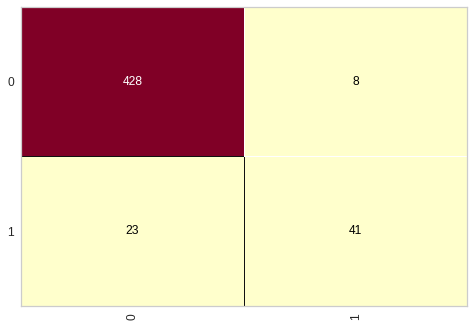

In [91]:
cm = ConfusionMatrix(naive_credit_data)
cm.fit(X_credit_teste, Y_credit_teste)
cm.score(X_credit_teste, Y_credit_teste)

In [93]:
from sklearn.metrics import classification_report
print(classification_report(Y_credit_teste, previsao))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500





CENSUS



In [94]:
with open ('/content/census.pkl', 'rb') as f:
  X_census_treinamento, Y_census_treinamento, X_census_teste, Y_census_teste = pickle.load(f)

In [95]:
X_census_treinamento.shape, Y_census_treinamento.shape

((27676, 108), (27676,))

In [96]:
X_census_teste.shape, Y_census_teste.shape

((4885, 108), (4885,))

In [97]:
naive_census_data = GaussianNB()

In [99]:
naive_census_data.fit(X_census_treinamento, Y_census_treinamento)

GaussianNB()

In [108]:
previsao = naive_census_data.predict(X_census_teste)
previsao

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [103]:
Y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [104]:
accuracy_score(Y_credit_teste, previsao)

0.938

In [106]:
from sklearn.metrics import confusion_matrix

In [109]:
confusion_matrix(Y_census_teste, previsao)

array([[1172, 2521],
       [  35, 1157]])

0.4767656090071648

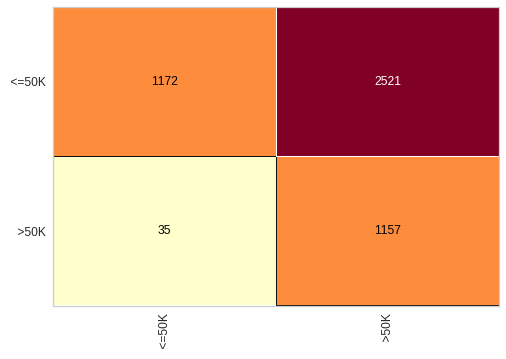

In [110]:
cm1 = ConfusionMatrix(naive_census_data)
cm1.fit(X_census_teste, Y_census_teste)
cm1.score(X_census_teste, Y_census_teste)

In [111]:
from sklearn.metrics import classification_report
print(classification_report(Y_census_teste, previsao))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885

